<a href="https://colab.research.google.com/github/LeoMcBills/ML-Algo-Exploration/blob/main/prac12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Characteristics of tensors
- nd-array
- GPU support
- Computational graph / Backpropagation
- Immutable

In [9]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

## Create a tensor

In [7]:
x = tf.constant(4, shape=(1,1), dtype=tf.float32)

In [8]:
print(x)

tf.Tensor([[4.]], shape=(1, 1), dtype=float32)


## neural net

In [10]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


In [11]:
# normalize the images
x_train, x_test = x_train / 255.0, x_test / 255.0

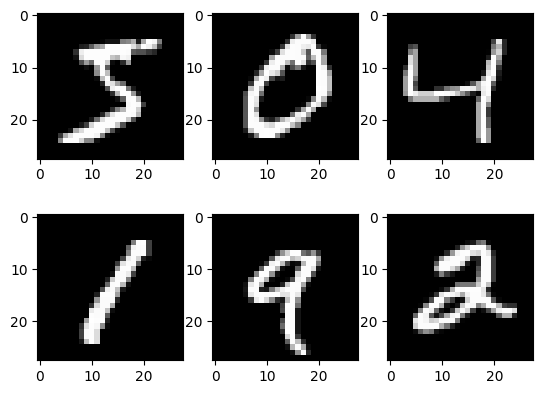

In [12]:
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(x_train[i], cmap='gray')
plt.show()

In [14]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# loss and optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(learning_rate=0.001)
metrics = ["accuracy"]

In [18]:
model.compile(loss=loss, optimizer=optim, metrics=metrics)

In [19]:
# training
batch_size = 64
epochs = 5

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, shuffle=True, verbose=2)

Epoch 1/5
938/938 - 8s - loss: 0.3021 - accuracy: 0.9147 - 8s/epoch - 8ms/step
Epoch 2/5
938/938 - 2s - loss: 0.1380 - accuracy: 0.9601 - 2s/epoch - 2ms/step
Epoch 3/5
938/938 - 2s - loss: 0.0970 - accuracy: 0.9717 - 2s/epoch - 2ms/step
Epoch 4/5
938/938 - 3s - loss: 0.0734 - accuracy: 0.9784 - 3s/epoch - 3ms/step
Epoch 5/5
938/938 - 2s - loss: 0.0592 - accuracy: 0.9819 - 2s/epoch - 2ms/step


In [20]:
# evaluate
model.evaluate(x_test, y_test, batch_size=batch_size, verbose=2)

157/157 - 1s - loss: 0.0819 - accuracy: 0.9745 - 981ms/epoch - 6ms/step


[0.08186810463666916, 0.9745000004768372]

In [21]:
# prediction
probability_model = keras.models.Sequential([
    model,
    keras.layers.Softmax(),
])

predictions = probability_model(x_test)
pred0 = predictions[0]
print(pred0)
label0 = np.argmax(pred0)
print(label0)

tf.Tensor(
[2.0204105e-07 3.8985657e-08 2.0615587e-05 2.2209273e-04 1.3438505e-09
 8.8070117e-08 5.1900602e-12 9.9973291e-01 1.0121311e-06 2.2959583e-05], shape=(10,), dtype=float32)
7
